In [2]:
import MDAnalysis as mda
import MDAnalysis.analysis.dihedrals as dih
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
u = mda.Universe("md_0_1.gro","md_0_1.xtc")
r = dih.Ramachandran(u.select_atoms('protein')).run()
angle_table = r.angles
phis = angle_table[:,:,0]       # extract phi angles (?)
psis = angle_table[:,:,1]       # extract psi angles (?)

Using subplots to plot multiple residues

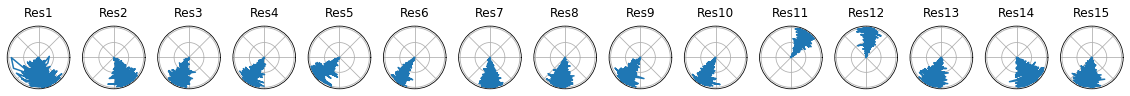

In [4]:
# create subplot, apply settings
num_residues = 15       # assign @ beginning
fig, axs = plt.subplots(1, num_residues, subplot_kw=dict(polar=True))
fig.set_size_inches(20,10)

#set constant list
resnums = list(range(num_residues))
radius = list(range(1001))
theta = list()      # list to hold lists of theta values

# assign data to axes
for i in resnums:
    theta.append(phis[:,i]*0.01745329)

# plot the data
#axs[0].plot(theta,radius)
for i in resnums:   # for each element in axs,
    axs[i].plot(theta[i],radius)    # plot the associated dialplot
    axs[i].set_xticklabels('')
    axs[i].set_yticklabels('')
    axs[i].set_title('Res'+str(i+1))

Dialplot for cyclic peptide with unusual ("non-protein") residues (CsA)

In [5]:
# setup rama analysis using the specified atoms (C, N, CA, C)
u = mda.Universe("md_0_1_298.gro", "md_0_1_298.xtc")
print(len(u.trajectory))

r = dih.Ramachandran(u.atoms, c_name='C', n_name='N', ca_name='CA', check_protein=False).run()

angle_table = r.angles
phis = angle_table[:,:,0]       # extract phi angles (?)
psis = angle_table[:,:,1]       # extract psi angles (?)

5001


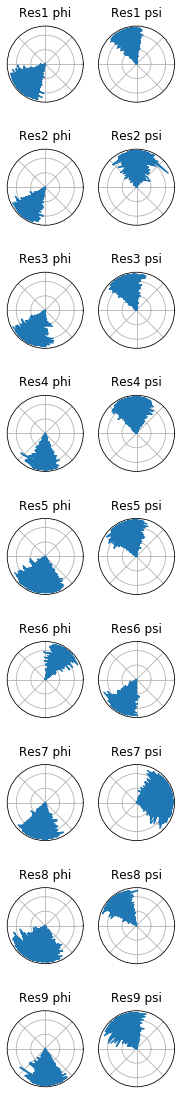

In [15]:
# create subplot, apply settings
num_residues = 9       # assign @ beginning
fig, axs = plt.subplots(num_residues, 2, subplot_kw=dict(polar=True))
fig.set_size_inches(3,20)
fig.tight_layout

#set constant list
resnums = list(range(num_residues))
radius = list(range(5001))
phi_list = list()      # list to hold lists of theta values
psi_list = list()

# assign data to axes
for i in resnums:
    phi_list.append(phis[:,i]*0.01745329)
    psi_list.append(psis[:,i]*0.01745329)

# plot the data
#axs[0].plot(theta,radius)
for i in resnums:   # for each element in axs,
    axs[i][0].plot(phi_list[i],radius)    # plot the associated dialplot
    axs[i][0].set_xticklabels('')
    axs[i][0].set_yticklabels('')
    axs[i][0].set_title('Res'+str(i+1)+' phi')
    axs[i][1].plot(psi_list[i],radius)    # plot the associated dialplot
    axs[i][1].set_xticklabels('')
    axs[i][1].set_yticklabels('')
    axs[i][1].set_title('Res'+str(i+1)+' psi')